In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [94]:
spotify_df = pd.read_csv('Most Streamed Spotify Songs 2024.csv',encoding="ISO-8859-1")

# Initial data cleaning

In [95]:
spotify_df.shape

(4600, 29)

In [96]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [97]:
spotify_df.isnull().sum().sort_values(ascending=False)

TIDAL Popularity              4600
Soundcloud Streams            3333
SiriusXM Spins                2123
Pandora Track Stations        1268
TikTok Posts                  1173
Pandora Streams               1106
Amazon Playlist Count         1055
YouTube Playlist Reach        1009
TikTok Views                   981
TikTok Likes                   980
Deezer Playlist Reach          928
Deezer Playlist Count          921
Spotify Popularity             804
Shazam Counts                  577
Apple Music Playlist Count     561
AirPlay Spins                  498
YouTube Likes                  315
YouTube Views                  308
Spotify Streams                113
Spotify Playlist Reach          72
Spotify Playlist Count          70
Artist                           5
Track                            0
Album Name                       0
Track Score                      0
All Time Rank                    0
ISRC                             0
Release Date                     0
Explicit Track      

In [98]:
# remove fields with too many nulls 
spotify_df = spotify_df.drop(columns=['ISRC','SiriusXM Spins','Soundcloud Streams','Pandora Track Stations'])
spotify_df.head(10)

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,725.4,"390,470,936","30,716","196,631,588",92.0,...,"150,597,040",210.0,"40,975",62.0,"17,598,718",114.0,"18,004,655","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","28,113","174,597,137",92.0,...,"156,380,351",188.0,"40,778",67.0,"10,422,430",111.0,"7,780,028","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,538.4,"601,309,283","54,331","211,607,669",92.0,...,"373,784,955",190.0,"74,333",136.0,"36,321,847",172.0,"5,022,621","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,...,"3,351,188,582",394.0,"1,474,799",264.0,"24,684,248",210.0,"190,260,277","11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,5,423.3,"107,034,922","7,223","151,469,874",88.0,...,"112,763,851",182.0,"12,185",82.0,"17,660,624",105.0,"4,493,884","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,6,410.1,"670,665,438","105,892","175,421,034",83.0,...,"2,867,222,632",138.0,"522,042",86.0,"17,167,254",152.0,"138,529,362","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,7,407.2,"900,158,751","73,118","201,585,714",86.0,...,"4,601,579,812",280.0,"383,478",168.0,"48,197,850",154.0,"65,447,476","9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,8,375.8,"675,079,153","40,094","211,236,940",92.0,...,"2,112,581,620",160.0,"17,221",87.0,"33,245,595",53.0,"3,372,428","6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,9,355.7,"1,653,018,119",1,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,10,330.6,"90,676,573","10,400","184,199,419",86.0,...,"174,706,874",191.0,"3,823",78.0,"10,800,098",92.0,"1,005,626","666,302",NaN,1


In [99]:
spotify_df.loc[:, 'Release Date'] = pd.to_datetime(spotify_df['Release Date'])
spotify_df.loc[:, 'Release Year'] = pd.to_datetime(spotify_df['Release Date']).dt.year
spotify_df.loc[:, 'Release Month'] = pd.to_datetime(spotify_df['Release Date']).dt.month

In [100]:
spotify_df.loc[:, 'Release Year'] = spotify_df['Release Year'].astype(str)
spotify_df.loc[:, 'Release Month'] = spotify_df['Release Month'].astype(str)

/var/folders/xt/h83_9z151d39hrq23601bptm0000gn/T/ipykernel_73677/3570080530.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2024' '2024' '2024' ... '2020' '2016' '2017']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  spotify_df.loc[:, 'Release Year'] = spotify_df['Release Year'].astype(str)
/var/folders/xt/h83_9z151d39hrq23601bptm0000gn/T/ipykernel_73677/3570080530.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['4' '5' '3' ... '2' '11' '4']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  spotify_df.loc[:, 'Release Month'] = spotify_df['Release Month'].astype(str)


In [101]:
spotify_df.head()

,Track,Album Name,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,...,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Release Year,Release Month
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26 00:00:00,1,725.4,"390,470,936","30,716","196,631,588",92.0,...,"40,975",62.0,"17,598,718",114.0,"18,004,655","2,669,262",NaN,0,2024,4
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04 00:00:00,2,545.9,"323,703,884","28,113","174,597,137",92.0,...,"40,778",67.0,"10,422,430",111.0,"7,780,028","1,118,279",NaN,1,2024,5
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19 00:00:00,3,538.4,"601,309,283","54,331","211,607,669",92.0,...,"74,333",136.0,"36,321,847",172.0,"5,022,621","5,285,340",NaN,0,2024,3
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12 00:00:00,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,...,"1,474,799",264.0,"24,684,248",210.0,"190,260,277","11,822,942",NaN,0,2023,1
4,Houdini,Houdini,Eminem,2024-05-31 00:00:00,5,423.3,"107,034,922","7,223","151,469,874",88.0,...,"12,185",82.0,"17,660,624",105.0,"4,493,884","457,017",NaN,1,2024,5


In [102]:
spotify_df.columns.to_list()

['Track',
 'Album Name',
 'Artist',
 'Release Date',
 'All Time Rank',
 'Track Score',
 'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'Spotify Popularity',
 'YouTube Views',
 'YouTube Likes',
 'TikTok Posts',
 'TikTok Likes',
 'TikTok Views',
 'YouTube Playlist Reach',
 'Apple Music Playlist Count',
 'AirPlay Spins',
 'Deezer Playlist Count',
 'Deezer Playlist Reach',
 'Amazon Playlist Count',
 'Pandora Streams',
 'Shazam Counts',
 'TIDAL Popularity',
 'Explicit Track',
 'Release Year',
 'Release Month']

In [103]:
desired_spotify_fields = spotify_df[['Album Name','Track','Artist','Release Date',
                                     'Release Month','Release Year',
                                      'All Time Rank','Spotify Streams',
                                      'YouTube Views', 'TikTok Views','Explicit Track',
                                      'Pandora Streams','Amazon Playlist Count',
                                      'Apple Music Playlist Count', 'Spotify Playlist Count',
                                      'Deezer Playlist Count']]

In [104]:
desired_spotify_fields.loc[:, 'Month-year'] = desired_spotify_fields[['Release Month','Release Year']].agg('-'.join,axis=1)

desired_spotify_fields.head()

/var/folders/xt/h83_9z151d39hrq23601bptm0000gn/T/ipykernel_73677/1903197410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desired_spotify_fields.loc[:, 'Month-year'] = desired_spotify_fields[['Release Month','Release Year']].agg('-'.join,axis=1)


,Album Name,Track,Artist,Release Date,Release Month,Release Year,All Time Rank,Spotify Streams,YouTube Views,TikTok Views,Explicit Track,Pandora Streams,Amazon Playlist Count,Apple Music Playlist Count,Spotify Playlist Count,Deezer Playlist Count,Month-year
0,Million Dollar Baby - Single,MILLION DOLLAR BABY,Tommy Richman,2024-04-26 00:00:00,4,2024,1,"390,470,936","84,274,754","5,332,281,936",0,"18,004,655",114.0,210.0,"30,716",62.0,4-2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04 00:00:00,5,2024,2,"323,703,884","116,347,040","208,339,025",1,"7,780,028",111.0,188.0,"28,113",67.0,5-2024
2,I like the way you kiss me,i like the way you kiss me,Artemas,2024-03-19 00:00:00,3,2024,3,"601,309,283","122,599,116","3,369,120,610",0,"5,022,621",172.0,190.0,"54,331",136.0,3-2024
3,Flowers - Single,Flowers,Miley Cyrus,2023-01-12 00:00:00,1,2023,4,"2,031,280,633","1,096,100,899","14,603,725,994",0,"190,260,277",210.0,394.0,"269,802",264.0,1-2023
4,Houdini,Houdini,Eminem,2024-05-31 00:00:00,5,2024,5,"107,034,922","77,373,957",NaN,1,"4,493,884",105.0,182.0,"7,223",82.0,5-2024


In [105]:
desired_spotify_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Album Name                  4600 non-null   object 
 1   Track                       4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   Release Month               4600 non-null   object 
 5   Release Year                4600 non-null   object 
 6   All Time Rank               4600 non-null   object 
 7   Spotify Streams             4487 non-null   object 
 8   YouTube Views               4292 non-null   object 
 9   TikTok Views                3619 non-null   object 
 10  Explicit Track              4600 non-null   int64  
 11  Pandora Streams             3494 non-null   object 
 12  Amazon Playlist Count       3545 non-null   float64
 13  Apple Music Playlist Count  4039 

In [106]:
# fill null values to zero 
desired_spotify_fields = desired_spotify_fields.fillna(0)

/var/folders/xt/h83_9z151d39hrq23601bptm0000gn/T/ipykernel_73677/2930574771.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  desired_spotify_fields = desired_spotify_fields.fillna(0)


In [107]:
desired_spotify_fields.columns.to_list()

['Album Name',
 'Track',
 'Artist',
 'Release Date',
 'Release Month',
 'Release Year',
 'All Time Rank',
 'Spotify Streams',
 'YouTube Views',
 'TikTok Views',
 'Explicit Track',
 'Pandora Streams',
 'Amazon Playlist Count',
 'Apple Music Playlist Count',
 'Spotify Playlist Count',
 'Deezer Playlist Count',
 'Month-year']

In [115]:
desired_spotify_fields['Deezer Playlist Count'].astype(int)

0        62
1        67
2       136
3       264
4        82
       ... 
4595      2
4596      1
4597      1
4598      0
4599      4
Name: Deezer Playlist Count, Length: 4600, dtype: int64

In [116]:
numeric_columns = ['All Time Rank',
 'Spotify Streams',
 'Pandora Streams',
 'YouTube Views',
 'TikTok Views',
 'Amazon Playlist Count',
 'Apple Music Playlist Count',
 'Spotify Playlist Count',
 'Deezer Playlist Count']


for num in numeric_columns:
    try:
        desired_spotify_fields[num] = desired_spotify_fields[num].astype(str).str.replace(',', '').astype(int)
    except:
        desired_spotify_fields[num] = desired_spotify_fields[num].astype(int)


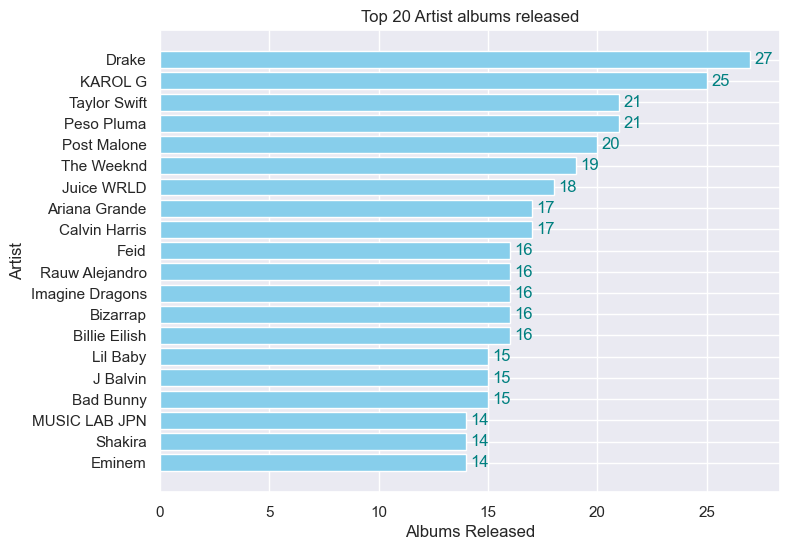

In [117]:
# initial insight on top 20 albums 
top_20_artists = (desired_spotify_fields.groupby('Artist')['Album Name'].nunique()
                       .reset_index(name='Album Count')
                       .sort_values(by='Album Count',ascending=False)
                       .reset_index(drop=True)).head(20)

plt.figure(figsize=(8,6))
plt.title('Top 20 Artist albums released')

bars = plt.barh(top_20_artists['Artist'],top_20_artists['Album Count'],color='skyblue')

# Add text labels for 
for bar, percent in zip(bars, top_20_artists['Album Count']):
    plt.text( + bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2 , f'{percent}' , color = 'teal',
             va='center', ha='left')


plt.gca().invert_yaxis()
plt.ylabel('Artist')
plt.xlabel('Albums Released')
plt.show()

# Insights want to find
<li> % of explicit tracks <li> correlation between explicity and streams <li> who is the highest perform <li> source most streamed song


In [118]:
# limit to a number of artists 
high_album_count_df = desired_spotify_fields[desired_spotify_fields['Artist'].isin(['Drake','KAROL G',
                                                             'Taylor Swift','Peso Pluma',
                                                             'Post Malone','The Weeknd',
                                                             'Juice WRLD','Ariana Grande'])]

In [119]:
def individual_artist_overview(data_df, artist:str):
    """"
    Return individual artists 
    """
    artist_info = data_df[data_df['Artist']==artist][['Release Date',
                                                      'Album Name',
                                                      'Track',
                                                      'All Time Rank',
                                                      'Spotify Streams',
                                                      'Explicit Track']]

    return artist_info

print('function to return information for ' + str(high_album_count_df['Artist'].unique().tolist()))

function to return information for ['Post Malone', 'Taylor Swift', 'Ariana Grande', 'The Weeknd', 'KAROL G', 'Peso Pluma', 'Juice WRLD', 'Drake']


In [120]:
def percentage_explicit(artist_df):
    """
    Returns percentage view of explicit artists
    """
    percentage_view = artist_df['Explicit Track'].value_counts(normalize=True)*100
    percentage_view = round(percentage_view)
    percentage_view = pd.DataFrame(percentage_view)
    percentage_view = percentage_view.reset_index()
    percentage_view = percentage_view[percentage_view['Explicit Track']==1]
    percentage_view = percentage_view.drop(columns='Explicit Track')
    percentage_view = percentage_view.rename(columns={'proportion':'Explicity (%)'})
    percentage_view = percentage_view.reset_index(drop=True)

    return percentage_view


 def artist_total_streams(artist_df,artist:str):
    """
    Returns total streams in a pandas dataframe
    """
    artist_df_sum = artist_df[artist_df['Artist']==artist]['Spotify Streams'].sum()
    artist_view = pd.DataFrame({'Artist': [artist], 'Total Spotify Streams':artist_df_sum})

    return artist_view    


In [122]:
df_list = []
artist_list = high_album_count_df['Artist'].unique().tolist()

for arty in artist_list:
    artist_streams = artist_total_streams(high_album_count_df,artist=arty)
    artist_explicit = percentage_explicit(high_album_count_df[high_album_count_df['Artist']==arty])
    joined_table = artist_streams.join(artist_explicit)

    df_list.append(joined_table)

In [249]:
top_level_artist = pd.concat(df_list)
top_level_artist = top_level_artist.set_index('Artist')
top_level_artist = top_level_artist.sort_values('Total Spotify Streams',ascending=True)

In [124]:
top_level_artist.corr()

,Total Spotify Streams,Explicity (%)
Total Spotify Streams,1.000000,-0.405944
Explicity (%),-0.405944,1.000000


In [125]:
print(top_level_artist.sort_values(by='Total Spotify Streams',ascending=False))
print('')
print('From here we can see that the Weeknd is the most streamed artist')

               Total Spotify Streams  Explicity (%)
Artist                                             
The Weeknd               36948540278           52.0
Drake                    34962157577           86.0
Taylor Swift             34470771165           21.0
Post Malone              26137472958           73.0
Ariana Grande            23464991696           46.0
Juice WRLD               14230348723          100.0
KAROL G                  13763899676           44.0
Peso Pluma                6150121558           86.0

From here we can see that the Weeknd is the most streamed artist


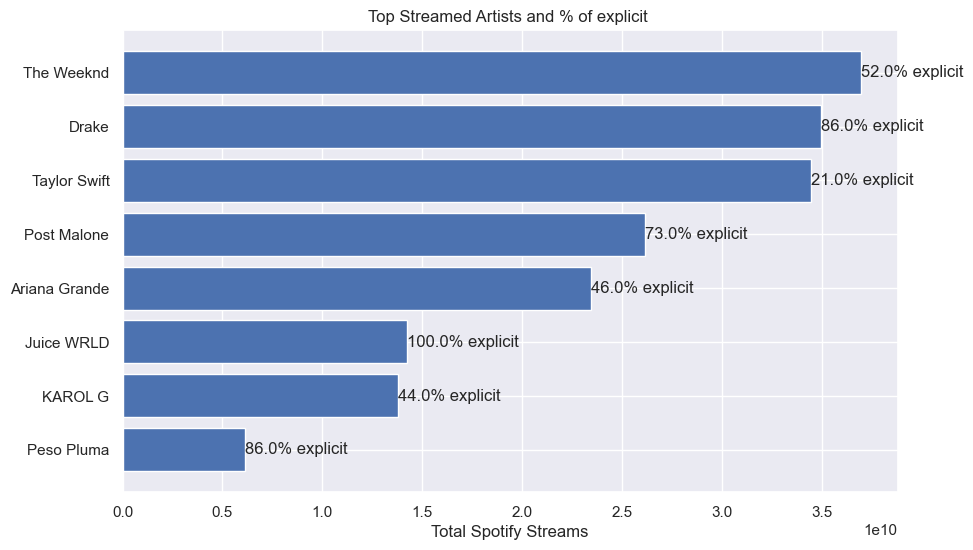

In [250]:
# first viz on top streamed artist 

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.title("Top Streamed Artists and % of explicit ")

bars = plt.barh(top_level_artist.index, top_level_artist['Total Spotify Streams'])

# Add text labels for explicit percentages
for bar, percent in zip(bars, top_level_artist['Explicity (%)']):
    plt.text( + bar.get_width() + 10000, bar.get_y() + bar.get_height() / 2, f'{percent}%' ' explicit', 
             va='center', ha='left')

plt.xlabel('Total Spotify Streams')

plt.show()

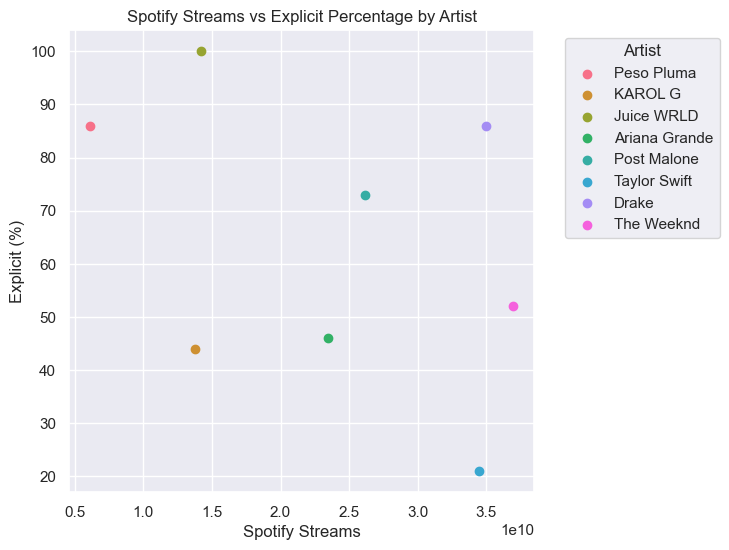

In [274]:
# check if there is a correlation between artist explicity and artist 

palette = sns.color_palette('husl', len(top_level_artist.index))

# Map each artist to a color
color_map = dict(zip(top_level_artist.index, palette))

# Create the scatter plot
plt.figure(figsize=(6, 6))
for artist in top_level_artist.index:
    if artist in color_map:  # Check if the artist is still in the color_map
        artist_data = top_level_artist[top_level_artist.index == artist]
        plt.scatter(artist_data['Total Spotify Streams'], artist_data['Explicity (%)'], 
                    color=color_map[artist], label=artist)

# Add title and labels
plt.title('Spotify Streams vs Explicit Percentage by Artist')
plt.xlabel('Spotify Streams')
plt.ylabel('Explicit (%)')

# Add legend
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [128]:
(individual_artist_overview(high_album_count_df,artist='Peso Pluma')
 .sort_values(by='All Time Rank',ascending=True)
 .reset_index(drop=True)).head()

,Release Date,Album Name,Track,All Time Rank,Spotify Streams,Explicit Track
0,2023-12-07,BELLAKEO,BELLAKEO,98,359803580,1
1,2023-06-22,LADY GAGA,LADY GAGA,212,684204777,1
2,2023-06-28,TULUM,TULUM,328,390182196,1
3,2023-06-22,Gï¿½ï¿½N,NUEVA VIDA,408,253464894,1
4,2023-12-06,Apple Music Live: Peso Pluma,La Bebe (Remix) [Apple Music Live],480,0,0


In [129]:
(individual_artist_overview(high_album_count_df,artist='Peso Pluma')
 .sort_values(by='Spotify Streams',ascending=False)
 .reset_index(drop=True)).head(1)

,Release Date,Album Name,Track,All Time Rank,Spotify Streams,Explicit Track
0,2023-06-22,LADY GAGA,LADY GAGA,212,684204777,1


In [130]:
(individual_artist_overview(high_album_count_df,artist='Ariana Grande')
 .sort_values(by='All Time Rank',ascending=True)
 .reset_index(drop=True))

,Release Date,Album Name,Track,All Time Rank,Spotify Streams,Explicit Track
0,2024-03-08,eternal sunshine,we can't be friends (wait for your love),29,591068364,0
1,2024-01-12,"yes, and?","yes, and?",199,416813996,1
2,2019-01-18,7 rings,7 rings,274,2262490403,1
3,2020-10-23,positions,positions,368,1432830108,1
4,2018-11-03,"thank u, next","thank u, next",515,1878196824,1
5,2016-04-01,Dangerous Woman,Side To Side,680,1427792654,1
6,2020-10-30,Positions,34+35,727,978617707,1
7,2024-03-08,eternal sunshine,the boy is mine,752,175336290,1
8,2018-04-20,No Tears Left To Cry,no tears left to cry,923,1331371819,0
9,2024-01-12,"yes, and?","yes, and?",1320,416813996,0


In [131]:
(individual_artist_overview(high_album_count_df,artist='Drake')
 .sort_values(by='All Time Rank',ascending=True)
 .reset_index(drop=True))

,Release Date,Album Name,Track,All Time Rank,Spotify Streams,Explicit Track
0,2024-05-03,Family Matters,Family Matters,154,72335127,1
1,2023-10-06,For All The Dogs,Rich Baby Daddy (feat. Sexyy Red & SZA),176,372248119,1
2,2023-10-06,For All The Dogs,IDGAF (feat. Yeat),187,406875019,1
3,2022-06-17,"Honestly, Nevermind",Jimmy Cooks (feat. 21 Savage),192,971473231,1
4,2023-10-06,For All The Dogs,First Person Shooter (feat. J. Cole),202,328526298,1
...,...,...,...,...,...,...
58,2023-10-06,For All The Dogs,Members Only (feat. PARTYNEXTDOOR),4075,64168685,1
59,2023-10-06,For All The Dogs,All The Parties (feat. Chief Keef),4177,48556312,1
60,2022-11-04,Her Loss,Hours In Silence,4218,147688885,1
61,2021-09-03,Certified Lover Boy,No Friends In The Industry,4267,219008713,1


In [132]:
(individual_artist_overview(high_album_count_df,artist='Post Malone')
 .sort_values(by='All Time Rank',ascending=True)
 .reset_index(drop=True))

,Release Date,Album Name,Track,All Time Rank,Spotify Streams,Explicit Track
0,2024-05-10,I Had Some Help,I Had Some Help (feat. Morgan Wallen),11,250080413,1
1,2018-10-18,Sunflower (Spider-Man: Into the Spider-Verse),Sunflower - Spider-Man: Into the Spider-Verse,116,3358704125,0
2,2019-08-30,Circles,Circles,170,2481391466,0
3,2022-06-03,Twelve Carat Toothache,I Like You (A Happier Song) (with Doja Cat),179,827950825,1
4,2017-09-15,rockstar,rockstar (feat. 21 Savage),231,2960046642,1
5,2023-04-14,Chemical,Chemical,250,503574147,1
6,2016-11-04,Congratulations,Congratulations,322,1984802459,1
7,2024-05-10,I Had Some Help,I Had Some Help (feat. Morgan Wallen),377,250080413,0
8,2018-02-23,Psycho (feat. Ty Dolla $ign),Psycho,650,1517935273,1
9,2018-12-24,Wow.,Wow.,657,1680612367,1


In [32]:
(individual_artist_overview(high_album_count_df,artist='Juice WRLD')
 .sort_values(by='All Time Rank',ascending=True)
 .reset_index(drop=True))

,Release Date,Album Name,Track,All Time Rank,Spotify Streams,Explicit Track
0,2018-05-04,Lucid Dreams,Lucid Dreams,150,2548389305,1
1,2018-04-13,All Girls Are The Same,All Girls Are The Same,439,1615353665,1
2,2020-07-10,Legends Never Die,Wishing Well,583,901486450,1
3,2018-05-22,Lean Wit Me,Lean Wit Me,1001,880781313,1
4,2019-02-13,Robbery,Robbery,1131,1306374052,1
5,2018-06-22,Legends,Legends,1166,681282854,1
6,2019-07-01,Sucker,Let Me Know (I Wonder Why Freestyle),1231,503584339,1
7,2020-07-09,Come & Go (with Marshmello),Come & Go (with Marshmello),1277,959313617,1
8,2019-03-08,Death Race For Love (Bonus Track Version),Bandit (with YoungBoy Never Broke Again),1538,925747848,1
9,2023-12-16,Lace It (with Eminem & benny blanco),Lace It,2023,70180212,1


In [133]:
# helper functions to automate some analysis

def top_streamed_songs(music_df,platform:str):
    """
    Top streamed songs per platform
    """
    top_platofrm = music_df[['Artist','Track',platform,'Explicit Track','All Time Rank']].sort_values(by=platform,ascending=False)
    top_10_platform = top_platofrm.head(10)
    top_10_platform = top_10_platform.reset_index()
    top_10_platform = top_10_platform.drop(columns='index')


    return top_10_platform


def visualise_platform(dataset:pd.DataFrame):
    """returns viisualisation of top artists in bar chart form """

    # set color scheme
    unique_data = dataset['Track'].unique().tolist()
    color_pallete = sns.color_palette('husl',len(unique_data))

    unique_color_palette = dict(zip(unique_data,color_pallete))

    # visualise in matplotlib
    plt.title('Top Tracks from ' + dataset.columns[2] )

    for one in unique_data:
        if one in unique_color_palette:
            one_data = dataset[dataset['Track'] == one]
            plt.bar(one_data['Track'],one_data[dataset.columns[2]],color=unique_color_palette[one], label=one)
    
    plt.xticks(rotation=90)
    plt.ylabel(dataset.columns[2])
    return plt.show()


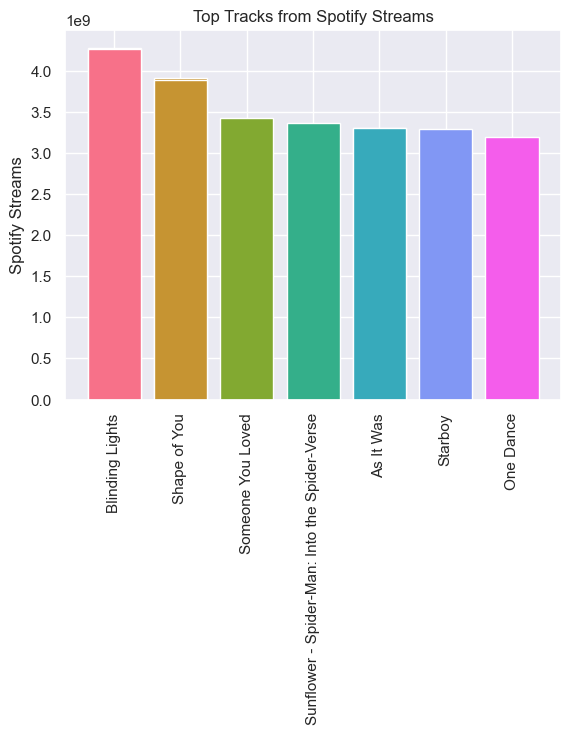

In [177]:
visualise_platform(top_streamed_songs(desired_spotify_fields,platform='Spotify Streams'))

In [254]:
top_streamed_platform = []

playlist = ['Amazon','Apple Music','Deezer','Spotify']

for play in playlist:
    top_tracks = top_streamed_songs(desired_spotify_fields,platform= play +' Playlist Count').head(1)
    top_tracks = top_tracks.rename(columns={top_tracks.columns[2]:'Playlist Count'})
    top_tracks['Platform'] = play
    top_streamed_platform.append(top_tracks)


top_track_playlist = pd.concat(top_streamed_platform)

In [255]:
top_track_playlist.drop(columns=['Explicit Track'])

,Artist,Track,Playlist Count,All Time Rank,Platform
0,Miley Cyrus,Flowers,210,4,Amazon
0,The Weeknd,Blinding Lights,859,56,Apple Music
0,Dua Lipa,Don't Start Now,632,149,Deezer
0,The Weeknd,Blinding Lights,590392,56,Spotify


In [236]:
# spotify playlist count too high so muust drop row 
top_track_playlist = top_track_playlist[top_track_playlist['Platform']!='Spotify']

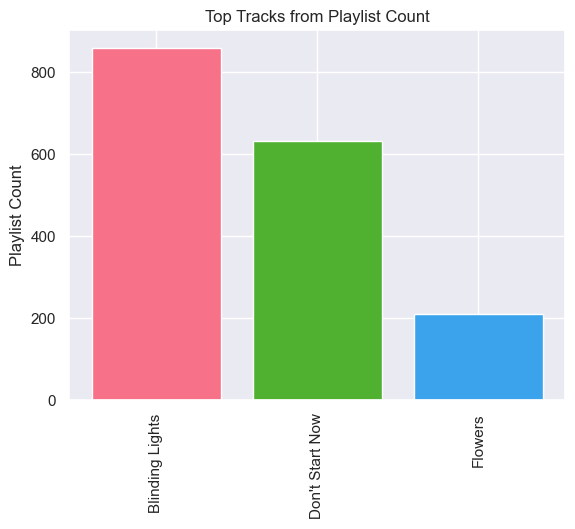

In [242]:
visualise_platform(top_track_playlist.sort_values(by='Playlist Count',ascending=False))

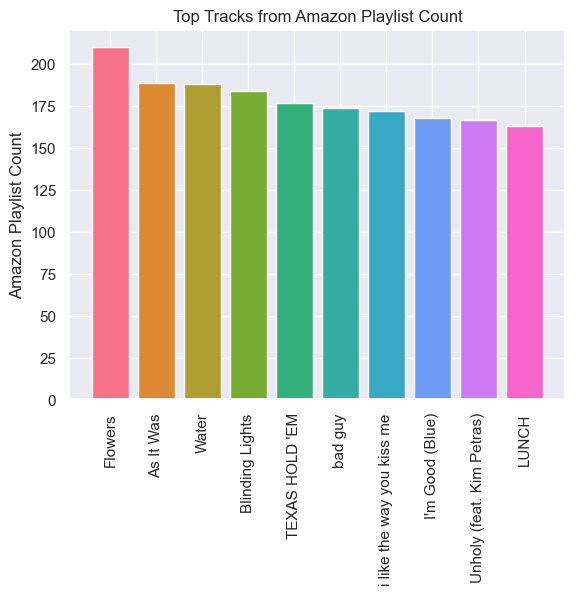

In [191]:
visualise_platform(top_streamed_songs(desired_spotify_fields,platform='Amazon Playlist Count'))

In [256]:
top_streamed_songs(desired_spotify_fields,platform='Amazon Playlist Count')

,Artist,Track,Amazon Playlist Count,Explicit Track,All Time Rank
0,Miley Cyrus,Flowers,210,0,4
1,Harry Styles,As It Was,189,0,20
2,Tyla,Water,188,0,33
3,The Weeknd,Blinding Lights,184,0,56
4,Beyoncï¿,TEXAS HOLD 'EM,177,1,24
5,Billie Eilish,bad guy,174,0,164
6,Artemas,i like the way you kiss me,172,0,3
7,David Guetta,I'm Good (Blue),168,1,43
8,Sam Smith,Unholy (feat. Kim Petras),167,0,60
9,Billie Eilish,LUNCH,163,0,13


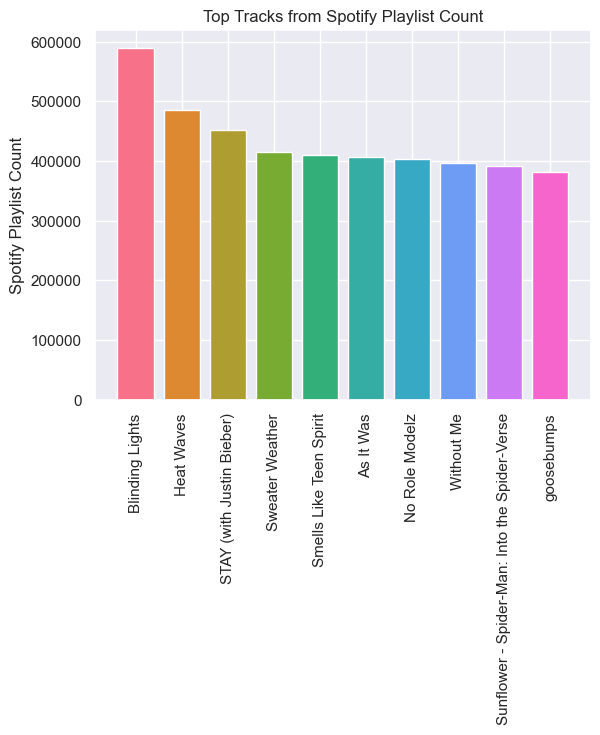

In [179]:
visualise_platform(top_streamed_songs(desired_spotify_fields,platform='Spotify Playlist Count'))

In [187]:
top_streamed_songs(desired_spotify_fields,platform='Deezer Playlist Count')

,Artist,Track,Deezer Playlist Count,Explicit Track,All Time Rank
0,Dua Lipa,Don't Start Now,632,0,149
1,Tones And I,Dance Monkey,584,0,40
2,Shawn Mendes,Seï¿½ï¿½o,570,0,165
3,The Weeknd,Blinding Lights,564,0,56
4,Harry Styles,Watermelon Sugar,557,0,243
5,Calvin Harris,One Kiss (with Dua Lipa),548,0,1024
6,Camila Cabello,Havana (feat. Young Thug),541,0,177
7,Ed Sheeran,Shape of You,512,0,54
8,Lewis Capaldi,Someone You Loved,502,0,133
9,Justin Timberlake,CAN'T STOP THE FEELING! (Original Song From Dr...,482,0,305


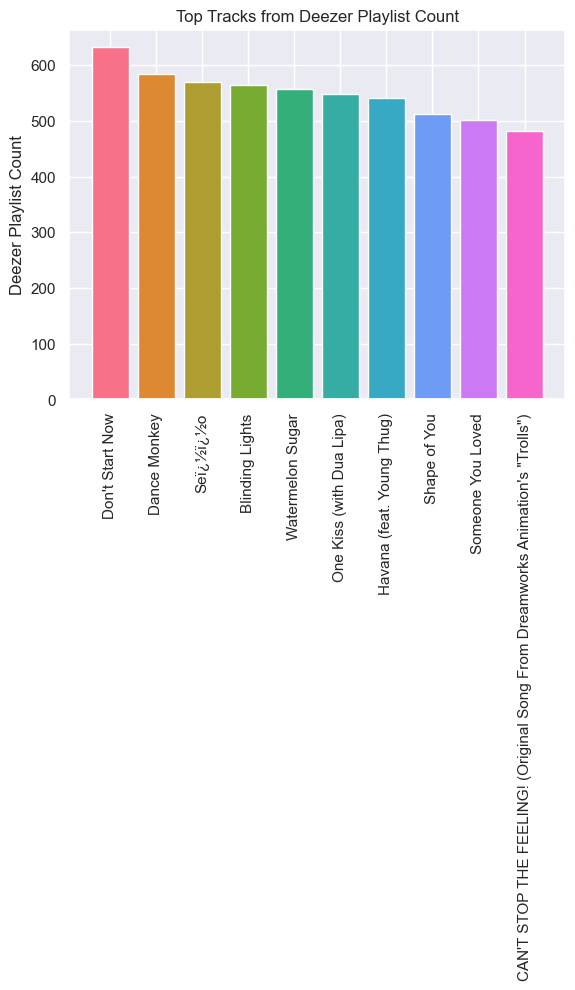

In [184]:
visualise_platform(top_streamed_songs(desired_spotify_fields,platform='Deezer Playlist Count'))

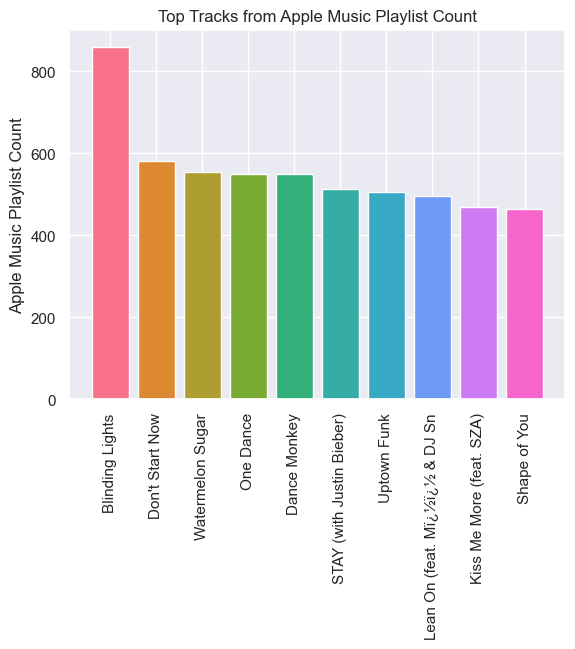

In [185]:
visualise_platform(top_streamed_songs(desired_spotify_fields,platform='Apple Music Playlist Count'))

In [257]:
top_streamed_songs(desired_spotify_fields,platform='Apple Music Playlist Count')

,Artist,Track,Apple Music Playlist Count,Explicit Track,All Time Rank
0,The Weeknd,Blinding Lights,859,0,56
1,Dua Lipa,Don't Start Now,581,0,149
2,Harry Styles,Watermelon Sugar,554,0,243
3,Drake,One Dance,550,0,518
4,Tones And I,Dance Monkey,549,0,40
5,The Kid LAROI,STAY (with Justin Bieber),513,1,27
6,Mark Ronson,Uptown Funk,507,1,254
7,Major Lazer,Lean On (feat. Mï¿½ï¿½ & DJ Sn,497,1,846
8,Doja Cat,Kiss Me More (feat. SZA),470,1,222
9,Ed Sheeran,Shape of You,465,0,54


In [188]:
top_streamed_songs(desired_spotify_fields,platform='TikTok Views')

,Artist,Track,TikTok Views,Explicit Track,All Time Rank
0,Kevin MacLeod,Monkeys Spinning Monkeys,233232311463,0,1018
1,The King Khan & BBQ Show,Love You So,214843956590,0,1918
2,Kreepa,Oh No,61088562861,1,473
3,Cavendish Music,Funny Song,38373644011,0,1539
4,Tollan Kim,Aesthetic,33870791454,0,114
5,Dante9k,Spongebob,33359398879,0,3356
6,Shayne Orok,She Share Story,33201904006,0,1156
7,Danilo Stankovic,Pieces,28032695489,0,3367
8,CKay,love nwantiti (ah ah ah),23933379729,1,256
9,The Kid LAROI,STAY (with Justin Bieber),23712377029,1,27


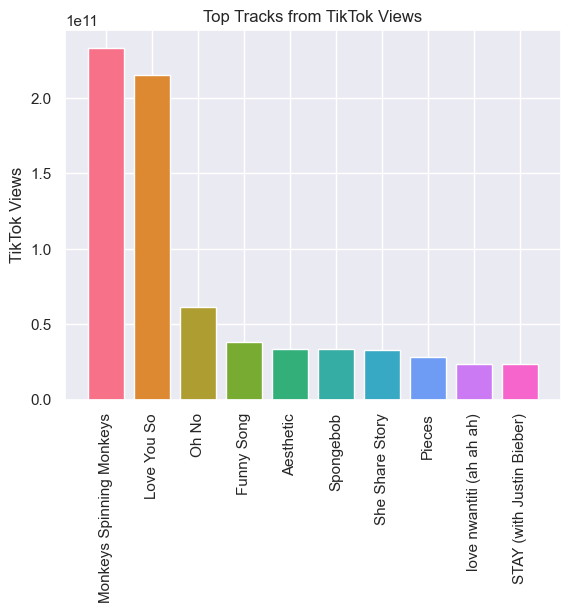

In [186]:
visualise_platform(top_streamed_songs(desired_spotify_fields,platform='TikTok Views'))

In [190]:
top_streamed_songs(desired_spotify_fields,platform='YouTube Views')

,Artist,Track,YouTube Views,Explicit Track,All Time Rank
0,Pinkfong,Baby Shark,16322756555,0,28
1,Luis Fonsi,Despacito,9537135721,0,50
2,Ed Sheeran,Shape of You,8013997219,0,54
3,Kids With Buns,bathroom floor,6736502312,0,15
4,Ed Sheeran,Perfect,6473698897,0,81
5,Wiz Khalifa,See You Again (feat. Charlie Puth),6335989683,0,251
6,PSY,Gangnam Style (ï¿½ï¿½ï¿½ï¿½ï¿½ï,5849588091,0,647
7,Mark Ronson,Uptown Funk,5644117304,1,254
8,Crazy Frog,Axel F,5049428366,0,1134
9,El Chombo,Dame Tu Cosita,5004189392,0,291


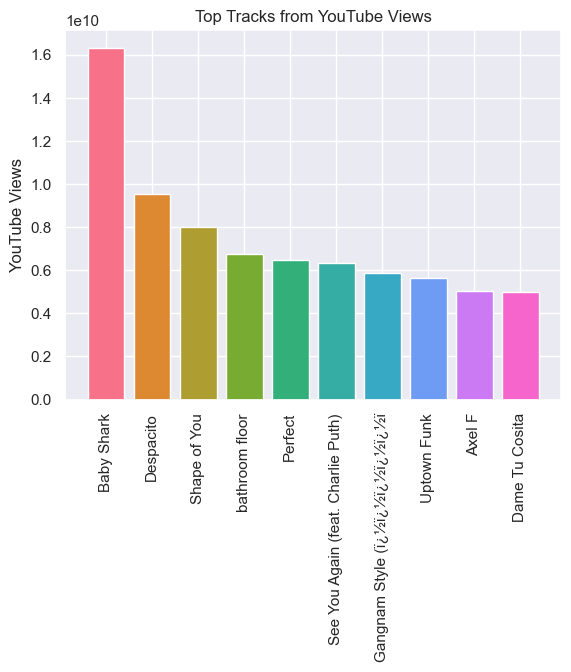

In [189]:
visualise_platform(top_streamed_songs(desired_spotify_fields,platform='YouTube Views'))

In [533]:
# most streamed songs 
(desired_spotify_fields[['Artist','Track','Spotify Streams','Explicit Track','All Time Rank']]
 .sort_values(by='Spotify Streams',ascending=False)).head(10)

,Artist,Track,Spotify Streams,Explicit Track,All Time Rank
55,The Weeknd,Blinding Lights,4281468720,0,56
4254,xSyborg,Blinding Lights,4261328190,0,4229
53,Ed Sheeran,Shape of You,3909458734,0,54
1637,xSyborg,Shape of You,3888356417,0,1807
132,Lewis Capaldi,Someone You Loved,3427498835,0,133
114,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3358704125,0,116
19,Harry Styles,As It Was,3301814535,0,20
3406,Harry Styles,As It Was,3299082422,0,3410
262,The Weeknd,Starboy,3291262413,1,265
519,Drake,One Dance,3192204066,0,518


# top 10 analysis

In [260]:
# see who are top 10 artists
top_10_df = desired_spotify_fields[desired_spotify_fields['All Time Rank']<11]
top_10_df

,Album Name,Track,Artist,Release Date,Release Month,Release Year,All Time Rank,Spotify Streams,YouTube Views,TikTok Views,Explicit Track,Pandora Streams,Amazon Playlist Count,Apple Music Playlist Count,Spotify Playlist Count,Deezer Playlist Count,Month-year
0,Million Dollar Baby - Single,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,4,2024,1,390470936,84274754,5332281936,0,18004655,114,210,30716,62,4-2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,5,2024,2,323703884,116347040,208339025,1,7780028,111,188,28113,67,5-2024
2,I like the way you kiss me,i like the way you kiss me,Artemas,2024-03-19,3,2024,3,601309283,122599116,3369120610,0,5022621,172,190,54331,136,3-2024
3,Flowers - Single,Flowers,Miley Cyrus,2023-01-12,1,2023,4,2031280633,1096100899,14603725994,0,190260277,210,394,269802,264,1-2023
4,Houdini,Houdini,Eminem,2024-05-31,5,2024,5,107034922,77373957,0,1,4493884,105,182,7223,82,5-2024
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,11,2023,6,670665438,131148091,2938686633,1,138529362,152,138,105892,86,11-2023
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,1,2024,7,900158751,308723145,534915313,0,65447476,154,280,73118,168,1-2024
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,2,2024,8,675079153,228382568,3804584163,1,3372428,53,160,40094,87,2-2024
8,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,Danza Kuduro - Cover,MUSIC LAB JPN,2024-06-09,6,2024,9,1653018119,0,0,1,0,0,0,1,0,6-2024
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,5,2024,10,90676573,32735244,974656200,1,1005626,92,191,10400,78,5-2024


In [268]:
top_Artist = top_10_df['Artist'].unique().tolist()

top_artist_hit_count = desired_spotify_fields[desired_spotify_fields['Artist'].isin(top_Artist)]

op_artist_hit_count_crosstab = pd.DataFrame(top_artist_hit_count['Artist'].value_counts()).reset_index()


op_artist_hit_count_crosstab

,Artist,count
0,Kendrick Lamar,18
1,Eminem,15
2,MUSIC LAB JPN,14
3,Miley Cyrus,13
4,Central Cee,9
5,Jack Harlow,8
6,Benson Boone,5
7,FloyyMenor,5
8,Tommy Richman,2
9,Artemas,2


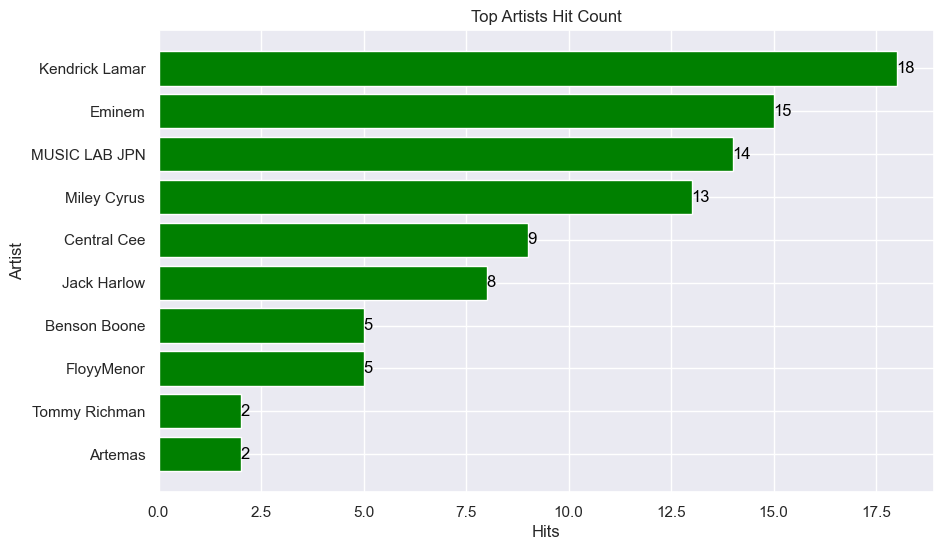

In [297]:
plt.figure(figsize=(10,6))
plt.title('Top Artists Hit Count')



bars = plt.barh(op_artist_hit_count_crosstab['Artist'],op_artist_hit_count_crosstab['count'],color='green')

# Add text labels for 
for bar, percent in zip(bars, op_artist_hit_count_crosstab['count']):
    plt.text( + bar.get_width(), bar.get_y() + bar.get_height()/2 , f'{percent}' , color = 'black',
             va='center', ha='left')



plt.ylabel('Artist')
plt.xlabel('Hits')
plt.gca().invert_yaxis()

In [299]:
top_artist_hit_count[['Album Name','Track','Artist','Release Date','Spotify Streams','All Time Rank']].head(10)

,Album Name,Track,Artist,Release Date,Spotify Streams,All Time Rank
0,Million Dollar Baby - Single,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,390470936,1
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,323703884,2
2,I like the way you kiss me,i like the way you kiss me,Artemas,2024-03-19,601309283,3
3,Flowers - Single,Flowers,Miley Cyrus,2023-01-12,2031280633,4
4,Houdini,Houdini,Eminem,2024-05-31,107034922,5
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,670665438,6
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,900158751,7
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,675079153,8
8,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,Danza Kuduro - Cover,MUSIC LAB JPN,2024-06-09,1653018119,9
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,90676573,10


In [300]:
len(top_Artist)

10

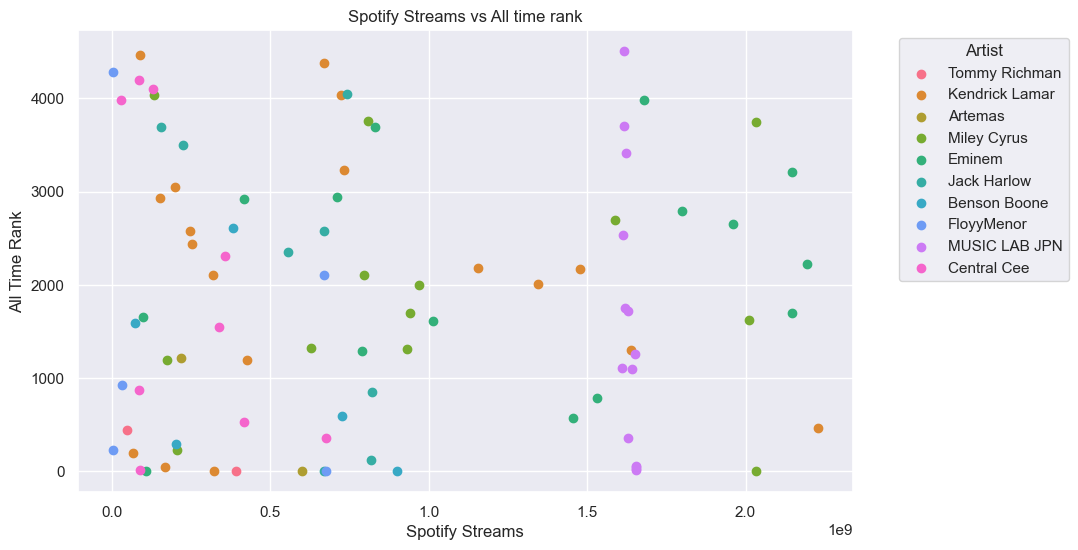

In [301]:
# Cleaner visualisation 

palette = sns.color_palette('husl', len(top_Artist))

# Map each artist to a color
color_map = dict(zip(top_Artist, palette))

# Create the scatter plot
plt.figure(figsize=(10, 6))
for artist in top_Artist:
    if artist in color_map:  # Check if the artist is still in the color_map
        artist_data = top_artist_hit_count[top_artist_hit_count['Artist'] == artist]
        plt.scatter(artist_data['Spotify Streams'], artist_data['All Time Rank'], 
                    color=color_map[artist], label=artist)

# Add title and labels
plt.title('Spotify Streams vs All time rank')
plt.xlabel('Spotify Streams')
plt.ylabel('All Time Rank')

# Add legend
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [302]:
top_artist_hit_count[top_artist_hit_count['Artist']=='FloyyMenor'].sort_values(by='All Time Rank',ascending=True)

,Album Name,Track,Artist,Release Date,Release Month,Release Year,All Time Rank,Spotify Streams,YouTube Views,TikTok Views,Explicit Track,Pandora Streams,Amazon Playlist Count,Apple Music Playlist Count,Spotify Playlist Count,Deezer Playlist Count,Month-year
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,2,2024,8,675079153,228382568,3804584163,1,3372428,53,160,40094,87,2-2024
223,Gata Only - Single,Gata Only,FloyyMenor,2023-12-21,12,2023,224,4674619,108313521,391444977,0,0,0,0,1841,0,12-2023
932,APAGA EL CEL - Single,APAGA EL CEL,FloyyMenor,2024-05-17,5,2024,929,33245898,15755338,0,1,18555,17,8,2343,3,5-2024
2114,GATA ONLY (Con Cris MJ),GATA ONLY (Con Cris MJ),FloyyMenor,2024-02-02,2,2024,2105,668280514,0,0,0,0,0,0,3,0,2-2024
4300,Gata Only (Remix),Gata Only (Remix),FloyyMenor,2024-06-07,6,2024,4280,3870862,0,0,1,92898,46,13,683,2,6-2024


In [303]:
top_artist_hit_count[top_artist_hit_count['Artist']=='Artemas'].sort_values(by='All Time Rank',ascending=True)

,Album Name,Track,Artist,Release Date,Release Month,Release Year,All Time Rank,Spotify Streams,YouTube Views,TikTok Views,Explicit Track,Pandora Streams,Amazon Playlist Count,Apple Music Playlist Count,Spotify Playlist Count,Deezer Playlist Count,Month-year
2,I like the way you kiss me,i like the way you kiss me,Artemas,2024-03-19,3,2024,3,601309283,122599116,3369120610,0,5022621,172,190,54331,136,3-2024
1216,if u think i'm pretty,if u think i'm pretty,Artemas,2023-10-24,10,2023,1212,219995278,25556375,561266399,1,284934,10,18,26538,12,10-2023


In [304]:
top_artist_hit_count[top_artist_hit_count['Artist']=='Tommy Richman'].sort_values(by='All Time Rank',ascending=True)

,Album Name,Track,Artist,Release Date,Release Month,Release Year,All Time Rank,Spotify Streams,YouTube Views,TikTok Views,Explicit Track,Pandora Streams,Amazon Playlist Count,Apple Music Playlist Count,Spotify Playlist Count,Deezer Playlist Count,Month-year
0,Million Dollar Baby - Single,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,4,2024,1,390470936,84274754,5332281936,0,18004655,114,210,30716,62,4-2024
446,Million Dollar Baby - Single,Million Dollar Baby (Vhs),Tommy Richman,2024-04-26,4,2024,445,48720820,0,0,0,0,17,62,5049,0,4-2024


In [305]:
# are these one hit wonders 

one_hit_df = top_artist_hit_count[top_artist_hit_count['Artist'].isin(['Artemas','Tommy Richman',
                                                          'FloyyMenor','Benson Boone'])]

one_hit_df.sort_values(by='Artist')


,Album Name,Track,Artist,Release Date,Release Month,Release Year,All Time Rank,Spotify Streams,YouTube Views,TikTok Views,Explicit Track,Pandora Streams,Amazon Playlist Count,Apple Music Playlist Count,Spotify Playlist Count,Deezer Playlist Count,Month-year
2,I like the way you kiss me,i like the way you kiss me,Artemas,2024-03-19,3,2024,3,601309283,122599116,3369120610,0,5022621,172,190,54331,136,3-2024
1216,if u think i'm pretty,if u think i'm pretty,Artemas,2023-10-24,10,2023,1212,219995278,25556375,561266399,1,284934,10,18,26538,12,10-2023
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,1,2024,7,900158751,308723145,534915313,0,65447476,154,280,73118,168,1-2024
293,Slow It Down,Slow It Down,Benson Boone,2024-03-22,3,2024,294,202667139,25188125,3500000,0,16853510,74,56,11945,37,3-2024
601,In The Stars,In The Stars,Benson Boone,2022-04-29,4,2022,597,725214939,204956968,2046007902,0,10018684,14,48,107667,19,4-2022
1605,Fireworks & Rollerblades,Cry,Benson Boone,2024-04-05,4,2024,1589,72952792,9235207,45173400,0,5625098,30,26,5724,10,4-2024
2628,GHOST TOWN,GHOST TOWN,Benson Boone,2021-10-15,10,2021,2612,382177076,78537068,629205287,0,27159277,14,46,65369,22,10-2021
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,2,2024,8,675079153,228382568,3804584163,1,3372428,53,160,40094,87,2-2024
223,Gata Only - Single,Gata Only,FloyyMenor,2023-12-21,12,2023,224,4674619,108313521,391444977,0,0,0,0,1841,0,12-2023
932,APAGA EL CEL - Single,APAGA EL CEL,FloyyMenor,2024-05-17,5,2024,929,33245898,15755338,0,1,18555,17,8,2343,3,5-2024


In [306]:
one_hit_df_track = one_hit_df[one_hit_df['All Time Rank']<10]

one_hit_df_track

,Album Name,Track,Artist,Release Date,Release Month,Release Year,All Time Rank,Spotify Streams,YouTube Views,TikTok Views,Explicit Track,Pandora Streams,Amazon Playlist Count,Apple Music Playlist Count,Spotify Playlist Count,Deezer Playlist Count,Month-year
0,Million Dollar Baby - Single,MILLION DOLLAR BABY,Tommy Richman,2024-04-26,4,2024,1,390470936,84274754,5332281936,0,18004655,114,210,30716,62,4-2024
2,I like the way you kiss me,i like the way you kiss me,Artemas,2024-03-19,3,2024,3,601309283,122599116,3369120610,0,5022621,172,190,54331,136,3-2024
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,1,2024,7,900158751,308723145,534915313,0,65447476,154,280,73118,168,1-2024
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,2,2024,8,675079153,228382568,3804584163,1,3372428,53,160,40094,87,2-2024


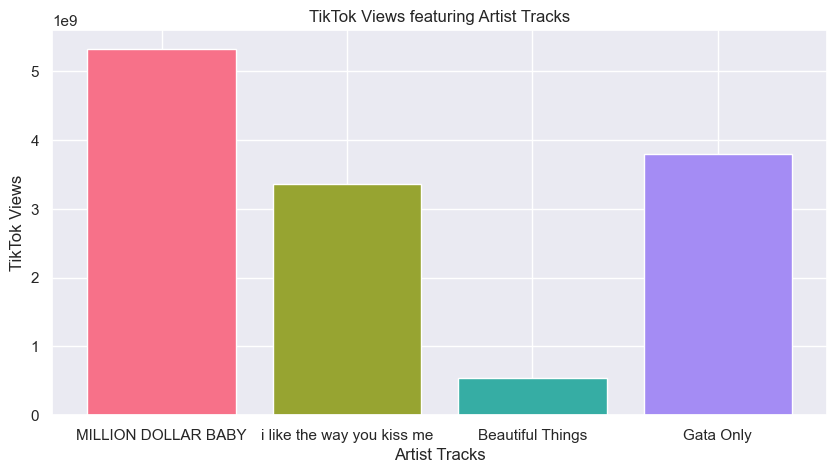

In [308]:
one_hit_artist = one_hit_df_track['Track'].unique().tolist()
colour = sns.color_palette('husl',len(one_hit_artist))

one_hit_colour = dict(zip(one_hit_artist,colour))


plt.figure(figsize=(10,5))

for one in one_hit_artist:
    if one in one_hit_colour:
        one_data = one_hit_df_track[one_hit_df_track['Track'] == one]
        plt.bar(one_data['Track'],one_data['TikTok Views'],color=one_hit_colour[one], label=one)

plt.ylabel('TikTok Views')
plt.xlabel('Artist Tracks')
plt.title('TikTok Views featuring Artist Tracks')
plt.show()

In [418]:
one_hit_colour

{'MILLION DOLLAR BABY': (0.9677975592919913,
  0.44127456009157356,
  0.5358103155058701),
 'i like the way you kiss me': (0.5920891529639701,
  0.6418467016378244,
  0.1935069134991043),
 'Beautiful Things': (0.21044753832183283,
  0.6773105080456748,
  0.6433941168468681),
 'Gata Only': (0.6423044349219739, 0.5497680051256467, 0.9582651433656727)}